In [19]:
## this ipynb for EDA the Data ##
from __future__ import print_function
from __future__ import division
from __future__ import unicode_literals

In [20]:
import pandas as pd
import numpy as np
import bokeh          ## visualize tool for browsers
from matplotlib import pyplot as plt
import seaborn as sns ##
#import tqdm          ##
from sklearn.ensemble        import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict, cross_val_score, KFold, train_test_split

%matplotlib inline

In [21]:
## three CSVs ## captured 7/20/2017
cities =   './brandon-telle-cruise-ship-locations/data/output_cities.csv'                        ## 55k
location = './brandon-telle-cruise-ship-locations/data/output_daily_ship_location.csv'           ## 72Meg
ships =    './brandon-telle-cruise-ship-locations/data/output_ships.csv' ## wikipedia references ## 51k
## represents data from 2003 to 1H2017
## see https://data.world/brandon-telle/cruise-ship-locations/

In [22]:
df_c = pd.read_csv(cities)
df_l = pd.read_csv(location)
df_s = pd.read_csv(ships)
# only 2 seconds to read the 

In [23]:
df_c.head()   ## id is string

,id,city,country,country_code,lat,lon,location
0,NaN,Port Vendres (Carcassonne),NaN,NaN,NaN,NaN,NaN
1,NaN,Puerto Quetzal (Antigua),NaN,NaN,NaN,NaN,NaN
2,ChIJDRIsQgFvDowRDoJZqcp_5D0,St. Martin,NaN,NaN,18.070830,-63.050081,POINT(18.0708298 -63.0500809)
3,ChIJSyCNfAfJlEARrofUZIqAX3w,Yalta,NaN,NaN,44.495205,34.166301,POINT(44.495205000000013 34.166301)
4,ChIJ4QD2vUx3zYgRYA13Gn5NKU4,Havana,Cuba,CU,23.113592,-82.366596,POINT(23.1135925 -82.3665956)


In [24]:
df_l.head()

,ship_name,callsign,major_cruise_line,date,meters_traveled,lat_start,lon_start,lat_end,lon_end,in_port,stopped_minutes,num_periods,port_city_id,port_city_name,port_city_country
0,Carnival Splendor,3EUS,Carnival Cruise Line,2013-10-24,147030.321045,39.1000,-73.8000,40.4207,-73.7793,True,597,16,ChIJrV5odTNjx4kR8GwA-0fk4qk,Dover,US
1,Carnival Splendor,3EUS,Carnival Cruise Line,2015-12-14,0.000000,25.3662,-79.9476,25.3662,-79.9476,False,0,1,ChIJEcHIDqKw2YgRZU-t3XHylv8,Miami,US
2,Carnival Splendor,3EUS,Carnival Cruise Line,2017-01-22,304820.653095,22.9000,-78.8000,25.4292,-79.9503,True,770,29,ChIJyduBuZl8L4kR0lBeSNMB7yo,Nassau,BS
3,Carnival Splendor,3EUS,Carnival Cruise Line,2014-12-24,14634.546541,20.6046,-86.9222,20.4845,-86.9793,True,536,11,ChIJJ5PRsO_4To8R_IsBXK68LjQ,Cozumel,MX
4,Carnival Splendor,3EUS,Carnival Cruise Line,2014-09-11,230024.991854,43.2000,-65.8000,44.3935,-63.4628,True,536,14,ChIJxesm0LsTRUsRW2dKWg1nkM0,Halifax,CA


In [25]:
df_s.head()     ## ship.name is the index

,name,callsign,wiki,imo,mmsi,cruise_line,major_cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag,home_port
0,Wind Surf,C6IO6,https://en.wikipedia.org/wiki/Wind_Surf_(ship),NaN,NaN,1990–1998: Club Med1998 onwards: Windstar Cruises,Other,1990.0,NaN,NaN,8.0,386.0,187.00,NaN,NaN,NaN
1,Marco Polo,C6JZ7,https://en.wikipedia.org/wiki/MS_Marco_Polo,6417097.0,308693000.0,1965–1980?: Baltic Shipping Company[1]1979?–19...,Other,1964.0,Ivan Franko-class passenger ship → Ocean liner,22080.0,NaN,820.0,176.28,passengers ship,BAHAMAS,nassau
2,Seabourn Quest,C6YZ5,https://en.wikipedia.org/wiki/MV_Seabourn_Quest,9483126.0,311038900.0,Seabourn Cruise Line,Other,2011.0,Seabourn Odyssey class,32477.0,11.0,450.0,198.15,passengers ship,BAHAMAS,nassau
3,Oriana,ZCDU9,https://en.wikipedia.org/wiki/MV_Oriana_(1995),9050137.0,310529000.0,P&O Cruises,Other,1995.0,NaN,69840.0,10.0,NaN,260.00,passengers ship,BERMUDA,hamilton
4,European Causeway,C6RG7,https://en.wikipedia.org/wiki/MV_European_Caus...,9208394.0,311027000.0,P&O Ferries,Other,2000.0,NaN,20646.0,NaN,410.0,156.20,ro,BAHAMAS,nassau


In [ ]:
## it properly reads the ndash(utf) object ##

In [ ]:
##df_s.isnull().sum()   ## ships
#name                   0  ## PK, FK
#callsign               0
#wiki                   9   URLS mainly
#imo                   46   instant message 
#mmsi                  49   maritime mobile service identities
#cruise_line           36
#major_cruise_line      0
#year_built            55
#class                127
#gross_tonnage         38
#decks                110
#capacity              66
#length                93
#vessel_type           46
#flag                  47
#home_port             85

In [ ]:
##df_c.isnull().sum()  ## cities
#id              2  ## scrub top two  entries  PK,FK
#city            0
#country         4  ## scrub top four entries
#country_code    4  ## same
#lat             2  ## 2
#lon             2
#location        2

In [ ]:
##df_l.isnull().sum()   ## locations
#ship_name            3130  ## PK,FK
#callsign                0
#major_cruise_line    3130
#date                    0     object  s/b datetime
#meters_traveled         0
#lat_start               0
#lon_start               0
#lat_end                 0
#lon_end                 0
#in_port                 0
#stopped_minutes         0   ## numeric   ( zero to ...)
#num_periods             0   ## categorical (never zero, 1 to 49)
#port_city_id         1228
#port_city_name       1228
#port_city_country    1823
#df_l.dtypes

In [26]:
df_c.shape          # 518, 7

(518, 7)

In [27]:
df_s.shape          # 276, 16

(276, 16)

In [28]:
print( df_l.shape)                      # 503207, 15
df_l.memory_usage(index=True).sum()   # 56.8MegBytes

(503207, 15)


56862471

In [ ]:
## Questions/ Thoughts ??
## What about cost per trip    ## Can I get price from another source
## Ship's average performance  ## Is it highly utilized, or under utilized?
## Ship's lifespan             ## How long do they last, or how quickly they retire?
## Is Ship's performance linked to their stock quote? ## yahoo-finance to get that data?


In [ ]:
## problems ##
# Tableau <!> Internal Error - An unexpected error occurred and the opperation could not be completed. 
# [Show Details]
# Watson Analytics has 65 medium quality (rating)

In [ ]:
# this URL for distance formulas:   http://www.movable-type.co.uk/scripts/latlong.html
# cool map and downloaded the code:  https://www.tytai.com/gmap/distance/

In [ ]:
# his Blog
# 1) which cruise line running the most ships?   Royal_Carabbean=25 CCL=24 Norwegian=16
# 2) how many Day/Ship combinations are missing data ?  83K
# 3) Most popular Ports?   Ft. Laud=3705, Vancouver=3236, Cozumel=3074,  Galveston?  Houston?  New Orleans?

In [29]:
# merge ships and locations
#df_l = pd.merge(df_l,df_s, left_on='ship_name', right_on='name')
## end up with callsign_x/y   and major_cruise_line_x/y (MORE CLEANUP)
df_l = pd.merge(df_l,df_s.rename(columns={'callsign': 'callsign_id', 'major_cruise_line': 'major_cruise_line_id'}), left_on='ship_name', right_on='name')


In [30]:
df_l.drop('callsign_id',         axis=1, inplace=True)
df_l.drop('major_cruise_line_id',axis=1, inplace=True)
df_l.drop('home_port',           axis=1, inplace=True)   # too much NaN data

In [31]:
# merge cities  (no need)
#df_l = pd.merge(df_l,df_c.rename(columns={'port_city_id': 'id', 'id': 'city_id'}), on='city_id')
print( df_l.shape )        ## 506377, 28
df_l.head()

(506377, 28)


,ship_name,callsign,major_cruise_line,date,meters_traveled,lat_start,lon_start,lat_end,lon_end,in_port,...,mmsi,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag
0,Carnival Splendor,3EUS,Carnival Cruise Line,2013-10-24,147030.321045,39.1000,-73.8000,40.4207,-73.7793,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
1,Carnival Splendor,3EUS,Carnival Cruise Line,2015-12-14,0.000000,25.3662,-79.9476,25.3662,-79.9476,False,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
2,Carnival Splendor,3EUS,Carnival Cruise Line,2017-01-22,304820.653095,22.9000,-78.8000,25.4292,-79.9503,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
3,Carnival Splendor,3EUS,Carnival Cruise Line,2014-12-24,14634.546541,20.6046,-86.9222,20.4845,-86.9793,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
4,Carnival Splendor,3EUS,Carnival Cruise Line,2014-09-11,230024.991854,43.2000,-65.8000,44.3935,-63.4628,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA


In [32]:
#df_l['ship_name'].groupby(df_l['major_cruise_line_x']).value_counts()    # not sorted
#df_l['ship_name'].groupby(df_l['major_cruise_line_x']).count()
#df_l.loc[:,['ship_name','major_cruise_line_x']].head()
#df_l.loc[:,['ship_name','major_cruise_line_x']].groupby('major_cruise_line_x').head()
#df_l.loc[:,['ship_name','major_cruise_line_x']].drop_duplicates('ship_name').groupby('major_cruise_line_x').head()
df_l.loc[:,['ship_name','major_cruise_line']].drop_duplicates('ship_name').groupby('major_cruise_line').count().sort_values('ship_name',ascending=False)       

# Other    ## 146  (huge) fix with cleanup
# Royal    ## 25
# CCL      ## 23
# Norwegian## 16
# Holland  ## 15

,ship_name
major_cruise_line,
Other,146
Royal Caribbean International,25
Carnival Cruise Line,23
Norwegian Cruise Line,16
Holland America Line,15
Costa Crociere,14
Princess Cruises,14
Celebrity Cruises,11
Silversea Cruises,4


In [33]:
df_l.loc[:,['ship_name','major_cruise_line']].drop_duplicates('ship_name').loc[df_l['major_cruise_line'] =='Royal Caribbean International'].sort_values('ship_name')   
## 25

,ship_name,major_cruise_line
315409,Adventure of The Seas,Royal Caribbean International
373243,Allure of the Seas,Royal Caribbean International
228855,Anthem Of The Seas,Royal Caribbean International
328394,Brilliance Of The Seas,Royal Caribbean International
275394,Enchantment of the Seas,Royal Caribbean International
320460,Explorer Of The Seas,Royal Caribbean International
349195,Freedom of the Seas,Royal Caribbean International
317868,Grandeur Of The Seas,Royal Caribbean International
365174,Independence of the Seas,Royal Caribbean International
329968,Island Escape,Royal Caribbean International


In [34]:

df_l.loc[:,['ship_name','major_cruise_line']].drop_duplicates('ship_name').loc[df_l['major_cruise_line'] =='Carnival Cruise Line'].sort_values('ship_name')
## 23

,ship_name,major_cruise_line
179805,Carnival Conquest,Carnival Cruise Line
248239,Carnival Destiny,Carnival Cruise Line
161693,Carnival Freedom,Carnival Cruise Line
186635,Carnival Glory,Carnival Cruise Line
47480,Carnival Legend,Carnival Cruise Line
54460,Carnival Liberty,Carnival Cruise Line
45189,Carnival Miracle,Carnival Cruise Line
49349,Carnival Pride,Carnival Cruise Line
182639,Carnival Spirit,Carnival Cruise Line
0,Carnival Splendor,Carnival Cruise Line


In [35]:
df_l.loc[:,['ship_name','major_cruise_line']].drop_duplicates('ship_name').loc[df_l['major_cruise_line'] =='Norwegian Cruise Line'].sort_values('ship_name')   
## 16

,ship_name,major_cruise_line
231174,Albatros,Norwegian Cruise Line
34524,Balmoral,Norwegian Cruise Line
379596,Norwegian Breakaway,Norwegian Cruise Line
279459,Norwegian Crown,Norwegian Cruise Line
263994,Norwegian Dawn,Norwegian Cruise Line
286427,Norwegian Dream,Norwegian Cruise Line
369704,Norwegian Epic,Norwegian Cruise Line
353697,Norwegian Gem,Norwegian Cruise Line
380540,Norwegian Getaway,Norwegian Cruise Line
341899,Norwegian Jewel,Norwegian Cruise Line


In [ ]:
## Most popular ports, I picked ones I had interest in
#df_l.sort_values('port_city_name').head()
#df_l.groupby('port_city_name').count().head()
#df_l.loc[df_l['port_city_name'] == 'Galveston'].count()    # 1326
#df_l.loc[df_l['port_city_name'] == 'Houston'].count()      # 24
#df_l.loc[df_l['port_city_name'] == 'New Orleans'].count()  # 2044
#df_l.loc[df_l['port_city_name'] == 'Cozumel'].count()      # 6510

In [36]:
# which ship traveled the most distance?
#df_l['ship_name'].groupby(df_l['major_cruise_line_x']).value_counts()
#df_l['meters_traveled'].groupby(df_l['ship_name']).sum()
df_l['meters_traveled'].groupby(df_l['ship_name']).sum().sort_values(ascending=False).head(10)


ship_name
Spirit Of Tasmania II      1.596397e+09
Volendam                   1.308336e+09
Splendour Of The Seas      1.284162e+09
Celebrity Solstice         1.263337e+09
Amsterdam                  1.091302e+09
Norwegian Pearl            1.067904e+09
Zaandam                    1.062173e+09
Celebrity Constellation    1.058205e+09
Noordam                    1.009234e+09
Norwegian Spirit           9.992868e+08
Name: meters_traveled, dtype: float64

In [37]:
# sort by ship year_built ?
#df_l[['ship_name','year_built']].sort_values('year_built').head(10)
#df_l[['ship_name','year_built']].sort_values('year_built').groupby(df_l['ship_name']).head(10) ## wrong

#df_l[['ship_name','year_built']].groupby(df_l['ship_name']).head(10)  ## not sorted but grouped by ship
#df_l[['ship_name','year_built']].groupby('ship_name').head(10)

#df_l[['ship_name','year_built']].sort_values('year_built').head(10)   ## still duplicate ships
df_l[['ship_name','year_built']].sort_values('year_built').drop_duplicates('ship_name').head(10)

## sort_values can sort on a list of columns ['col1','col2']
## unique() should work but does not
## drop_duplicates

,ship_name,year_built
214383,Sea Cloud,1931.0
159482,Tustumena,1963.0
506376,Oceanic,1963.0
487418,Matanuska,1963.0
487135,Malaspina,1963.0
285735,Marco Polo,1964.0
499747,National Geographic Sea Bird,1966.0
502861,National Geographic Sea Lion,1966.0
30813,Queen Elizabeth 2,1969.0
164395,The Azur,1971.0


In [38]:
# what are the newest ships
#df_l[['ship_name','year_built']].sort_values('year_built').drop_duplicates('ship_name').tail(10) # gives NaN
df_l[['ship_name','year_built']].sort_values('year_built').dropna(subset=['year_built']).drop_duplicates('ship_name').tail(10)

,ship_name,year_built
378708,Seabourn Quest,2011.0
491603,Celebrity Silhouette,2011.0
80252,Costa Favolosa,2011.0
81886,Costa Fascinosa,2012.0
495563,Celebrity Reflection,2012.0
379898,Norwegian Breakaway,2013.0
228634,Quantum Of The Seas,2014.0
381546,Norwegian Getaway,2014.0
229123,Anthem Of The Seas,2015.0
164247,Carnival Vista,2016.0


In [39]:
## need EDA conversion to get this format, also datetime is UTC
# example: df_movies['Released'] = pd.to_datetime(df_movies['Released'], infer_datetime_format=True)
df_l['date'] = pd.to_datetime(df_l['date'], infer_datetime_format=True, format="%y-%m-%d", utc=True) 
## unit='D' instead of default ns

In [ ]:
#df_l.dtypes   ## now datetime64[ns]
## https://docs.scipy.org/doc/numpy-dev/reference/arrays.datetime.html

In [40]:
# first year a ship sailed (check if 2003 when data begins or shortly after)
df_l[['ship_name','date']].sort_values('date').head()

,ship_name,date
17480,Napoleon Bonaparte,2003-01-01
190245,Star Pisces,2003-01-01
142769,Statendam,2003-01-01
41565,Fantasy,2003-01-01
138740,Ryndam,2003-01-01


In [41]:
# last year a ship sailed
df_l[['ship_name','date']].sort_values('date').tail()

,ship_name,date
173571,MSC Magnifica,2017-06-28
496083,Celebrity Reflection,2017-06-28
117667,Stad Amsterdam,2017-06-28
328923,Brilliance Of The Seas,2017-06-28
331463,Legend Of The Seas,2017-06-28


In [ ]:
## inspect missing data ##

In [42]:
## 3k missing ship names (fixed) ## next time use df_subset ## what is the callsign?
## was 36 with missing cruise line info
#sns.countplot(x='ship_name',data=df_l, hue='ship_name') ## TOO BIG
#df_l[['ship_name','callsign_x']].sort_values('ship_name',ascending=True).drop_duplicates('callsign_x').head(10)
#df_l['ship_name'].sum()  ## bad error, see next cell:
# add: --NotebookApp.iopub_data_rate_limit=10000000      ## 10 Mil
## Riley says AWS lecture on Wednesday, may help
#df_l['ship_name'].value_counts().sum()    ## 506377 which is same a shape
print( df_l.shape)                           ## 506377, 28
df_l.isnull().sum()


(506377, 28)


ship_name                 0
callsign                  0
major_cruise_line         0
date                      0
meters_traveled           0
lat_start                 0
lon_start                 0
lat_end                   0
lon_end                   0
in_port                   0
stopped_minutes           0
num_periods               0
port_city_id           1232
port_city_name         1232
port_city_country      1862
name                      0
wiki                   9952
imo                   60243
mmsi                  60363
cruise_line           41888
year_built            87296
class                182176
gross_tonnage         45439
decks                163510
capacity              95379
length               163749
vessel_type           60243
flag                  60286
dtype: int64

In [ ]:
# Error message:
#IOPub data rate exceeded.
#The notebook server will temporarily stop sending output
#to the client in order to avoid crashing it.
#To change this limit, set the config variable
#`--NotebookApp.iopub_data_rate_limit`.

In [ ]:
# num_periods data and stop_minutes are useful together
# 3 tableau plots
# 1 watson plot 

In [ ]:
## https://everydaydata.co/2017/07/04/cruse-scraper.html  # blog July 4, 2017

In [ ]:
# what do I want to model ##
## thoughts on using mcmc and pymc3 (except requires python3)
## encapsolate everything you have learned (show it off in portfolio)
## now think about what modeling to use, and what to predict next ##
# a) travel lifespan -- think early, middle, recent (tracing and/or distribution)
# b) rank different carriers
# c) predict congestion (at ports)
# d) predict density (I do not know the distribution)
# e) predict increased traffic trend ## any hypothesis
# f) predict safety (discuss this option)
# g) yearly (macroscopic) stock trend correlate with this data   (Liz would want to by stock in CCL, or favorite)
# h) question: What impact did weather have? Is their correlation?
##   more ... FAQ, ask around ... focus on the business information (BI) perspective

In [ ]:
#from ipyparallel import Client   ## ImportError: No module named ipyparallel

In [ ]:
## now 8 plots to choose, ## 3 stored plots & 1 map plot  

In [43]:
## checkpoint before vessel drop
df_v1 = df_l[df_l.vessel_type == 'passenger']
print( df_v1.shape)              # 1950, 28
df_v2 = df_l[df_l.vessel_type == 'passengers ship']
print( df_v2.shape)              # 356129, 20

df_v = pd.concat([df_v1,df_v2])
print( df_v.shape)               # 358079, 20    ## df_vessel
pd.DataFrame(df_v).to_csv('check_dfv.csv', index=False, encoding='utf-8')  ## 120Meg vs before was 160Meg
## drop everything except "passengers ship" and  "passenger"


(1950, 28)
(356129, 28)
(358079, 28)


In [26]:
# convert in_port bool
df_v['in_port'] = df_v.in_port.map({True: 1, False:0})   ## dont run twice

In [44]:
df_v.dropna( inplace=True)
print( df_v.shape )                 #141910, 28
print( df_v.isnull().sum() )
print( df_v.dtypes )

(141910, 28)
ship_name            0
callsign             0
major_cruise_line    0
date                 0
meters_traveled      0
lat_start            0
lon_start            0
lat_end              0
lon_end              0
in_port              0
stopped_minutes      0
num_periods          0
port_city_id         0
port_city_name       0
port_city_country    0
name                 0
wiki                 0
imo                  0
mmsi                 0
cruise_line          0
year_built           0
class                0
gross_tonnage        0
decks                0
capacity             0
length               0
vessel_type          0
flag                 0
dtype: int64
ship_name                    object
callsign                     object
major_cruise_line            object
date                 datetime64[ns]
meters_traveled             float64
lat_start                   float64
lon_start                   float64
lat_end                     float64
lon_end                     float64
in_por

In [45]:
#features= [c for c in df_v.columns \
#           if (not 'wiki' in c) and (not 'imo' in c) and (not 'mmsi' in c) and (not '_end' in c)]
        ## dont need wiki URL,  dont need contact, dont need contact, _end is for Label
#features = ['date','meters_traveled','lat_start','lon_start','in_port','stopped_minutes','num_periods','year_built', 'gross_tonnage', 'decks', 'capacity', 'length' ]
features = [        'meters_traveled','lat_start','lon_start','in_port','stopped_minutes','num_periods','year_built', 'gross_tonnage', 'decks', 'capacity', 'length' ]
# removed datetime[ns]

print( features)  ## numeric for model 
#[ 'meters_traveled', 'lat_start', 'lon_start','in_port', 'stopped_minutes', 'num_periods',
#'year_built', 'gross_tonnage', 'decks', 'capacity', 'length']

['meters_traveled', 'lat_start', 'lon_start', 'in_port', 'stopped_minutes', 'num_periods', 'year_built', 'gross_tonnage', 'decks', 'capacity', 'length']


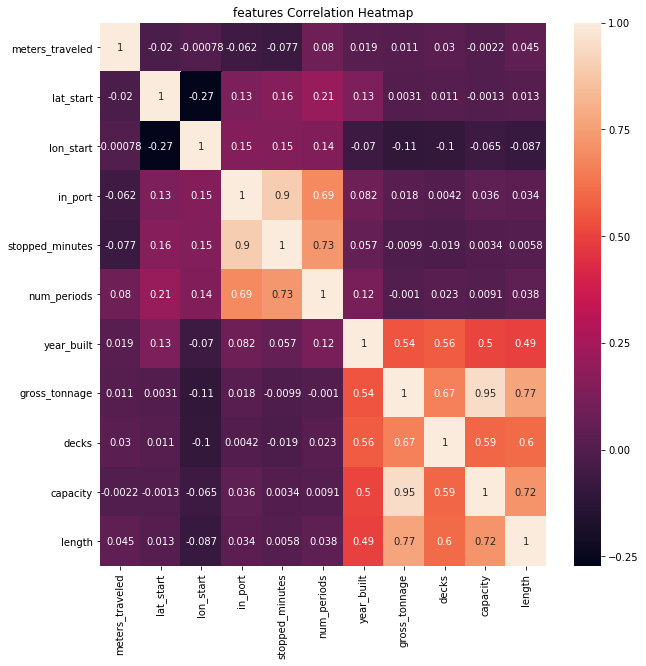

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df_v[features].corr(), annot=True)   ## these are features only
                                                 ## not listed is datetime[ns]
plt.title("features Correlation Heatmap") 

In [47]:
X = df_v[features]
y_lat = df_v['lat_end'].values
y_lon = df_v['lon_end'].values

X_train, X_test, y_lat_train, y_lat_test, y_lon_train, y_lon_test = train_test_split(X,y_lat,y_lon) 
# default 30%

In [48]:
print( X.shape)          # 141910, 11
print( y_lat.shape)      # 141910
print( y_lon.shape)      # same

(141910, 11)
(141910,)
(141910,)


In [49]:
kf = KFold(random_state=2003)                         ## default is 3 fold, conservative
gbr_lat = GradientBoostingRegressor(random_state=2003)
gbr_lon = GradientBoostingRegressor(random_state=2003)

In [50]:
gbr_lat.fit(X_train, y_lat_train)
gbr_lon.fit(X_train, y_lon_train)

#lat_pred = cross_val_predict(gbr_lat,X_test,y_lat_test, cv=kf)
#lon_pred = cross_val_predict(gbr_lon,X_test,y_lon_test, cv=kf)

#print cross_val_score(gbr_lat, X_test, y_lat_test, cv=kf, scoring='accuracy').mean()  # continuous not supported
#print cross_val_score(gbr_lon, X_test, y_lon_test, cv=kf, scoring='accuracy').mean()  # continuous not supported

# this is R2 score instead for Regression, too good to be true, check if it leaked
print( cross_val_score(gbr_lat, X_test, y_lat_test, cv=kf).mean())  ## .991 R2, very good w/o in_port
print( cross_val_score(gbr_lon, X_test, y_lon_test, cv=kf).mean())  ## .985 R2, very good w/o in_port
                                                                    ## .991 w/in_port  lat
                                                                    ## .989 w/in_port  lon
        ## about 27sec runtime (total for both)
        ## about 23sec runtime with 10Mil IO

0.992067109421
0.990520712739


In [ ]:
# 8/25 image models is x,y,z but DataFrame is typical spreadsheet style

In [51]:
from bokeh.io import output_notebook, show
output_notebook()
# BokehJS 0.12.6 successfully loaded.

Loading BokehJS ...

In [52]:
from bokeh.plotting import figure
from bokeh.tile_providers import WMTSTileSource

USA = x_range,y_range = ((-13884029,-7453304), (2698291,6455972))  ## this is starting figure

fig = figure(tools='pan, wheel_zoom', x_range=x_range, y_range=y_range)
fig.axis.visible = False
type(USA)

tuple

In [53]:
url = 'http://a.basemaps.cartocdn.com/dark_all/{Z}/{X}/{Y}.png'
attribution = "Map tiles by Carto, under CC BY 3.0. Data by OpenStreetMap, under ODbL"
fig.add_tile(WMTSTileSource(url=url, attribution=attribution));
#TitleRenderer(id='...',...)

In [54]:
def wgs84_to_web_mercator(df, lon="lon", lat="lat"):
    """Converts decimal longitude/latitude to Web Mercator format"""
    k = 6378137
    df["x"] = df[lon] * (k * np.pi/180.0)
    df["y"] = np.log(np.tan((90 + df[lat]) * np.pi/360.0)) * k
    return df

#atx_df = pd.DataFrame(dict(name=["Austin",],lon=[-97.7431,],lat=[30.2672,]))
#wgs84_to_web_mercator(atx_df)
#fig.circle(x=atx_df['x'], y=atx_df['y'],fill_color='red', size=10)

#plot_df = pd.DataFrame(dict(name=["Austin",],lon=[-97.7431,],lat=[30.2672,]))
#wgs84_to_web_mercator(plot_df)
#fig.circle(x=plot_df['x'], y=plot_df['y'],fill_color='red', size=10)
#show(fig)

In [4]:
!python --version

Python 2.7.13


In [55]:
df_v[df_v['ship_name'] == 'Carnival Splendor']

,ship_name,callsign,major_cruise_line,date,meters_traveled,lat_start,lon_start,lat_end,lon_end,in_port,...,mmsi,cruise_line,year_built,class,gross_tonnage,decks,capacity,length,vessel_type,flag
0,Carnival Splendor,3EUS,Carnival Cruise Line,2013-10-24,147030.321045,39.1000,-73.8000,40.4207,-73.7793,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
1,Carnival Splendor,3EUS,Carnival Cruise Line,2015-12-14,0.000000,25.3662,-79.9476,25.3662,-79.9476,False,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
2,Carnival Splendor,3EUS,Carnival Cruise Line,2017-01-22,304820.653095,22.9000,-78.8000,25.4292,-79.9503,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
3,Carnival Splendor,3EUS,Carnival Cruise Line,2014-12-24,14634.546541,20.6046,-86.9222,20.4845,-86.9793,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
4,Carnival Splendor,3EUS,Carnival Cruise Line,2014-09-11,230024.991854,43.2000,-65.8000,44.3935,-63.4628,True,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
5,Carnival Splendor,3EUS,Carnival Cruise Line,2008-10-01,450253.870821,38.9000,12.4000,39.0000,7.2000,False,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
6,Carnival Splendor,3EUS,Carnival Cruise Line,2011-05-28,0.000000,28.9000,-116.2000,28.9000,-116.2000,False,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
7,Carnival Splendor,3EUS,Carnival Cruise Line,2014-09-02,493949.759667,40.3650,-72.9519,41.3699,-67.2355,False,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
8,Carnival Splendor,3EUS,Carnival Cruise Line,2013-06-19,338015.109849,39.9118,-73.2999,37.0000,-72.2000,False,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA
9,Carnival Splendor,3EUS,Carnival Cruise Line,2013-05-18,0.000000,39.9763,-73.2973,39.9763,-73.2973,False,...,372808000.0,Carnival Cruise Lines,2008.0,Splendor-class cruise ship,113562.0,13.0,3006.0,290.0,passengers ship,PANAMA


In [39]:
df_v[df_v['ship_name'] == 'Carnival Splendor'].index[0]

0

In [56]:
df_v[df_v['ship_name'] == 'Carnival Splendor'].shape[0]

2106

In [42]:
#df_v[df_v['date'] == '2017-06-1']
#plot_df = pd.DataFrame()  # initialize
for i in range(df_v[df_v['ship_name'] == 'Carnival Splendor'].shape[0]//20):
    #print( df_v[df_v['date'] == '2017-06-1'].iloc[i,0], \
    #       df_v[df_v['date'] == '2017-06-1'].iloc[i,5], \
    #       df_v[df_v['date'] == '2017-06-1'].iloc[i,6] )
    plot_df = pd.DataFrame(dict(name=[df_v[df_v['ship_name'] == 'Carnival Splendor'].iloc[i,0] ,], \
                                lat=[df_v[df_v['ship_name'] == 'Carnival Splendor'].iloc[i,5]  ,], \
                                lon=[df_v[df_v['ship_name'] == 'Carnival Splendor'].iloc[i,6], ] \
                               ))
    wgs84_to_web_mercator(plot_df)
    fig.circle(x=plot_df['x'], y=plot_df['y'],fill_color='red', size=5)
## end-for    
show(fig)

In [ ]:
## above plot showing ship_name "Carnival Splendor" on tracking for 2106 entries

In [43]:
plot_df   ## only the last one

,lat,lon,name,x,y
0,22.7,-109.6,Carnival Splendor,-1.220062e+07,2.595779e+06


In [41]:
2106 // 20


105

In [2]:
import ipywidgets as widgets
#widgets.Text(value='Hello World!',)
widgets.IntSlider(max=2106)

In [13]:
from IPython.display import display
#i = widgets.Text(value='TimeSlice#',disable=True)  # this is dialog b ox
#print('pick slider for  1<TimeSlice<2106')
i = widgets.IntSlider(max=2106, description='0 < TimeSlice < 2106')
display(i)
#Widget Javascript not detected. It may not be installed or enabled properly.

In [ ]:
# jupyter nbextension enable --py widgetsnbextension
# jupyter nbextension list
# restart did not bring in the new extension

In [57]:
i
i.value

1058

In [70]:
from IPython.display import display
button = widgets.Button(description="Click to Display Ship on Map!")
display(button)

def on_button_clicked(b):
    print("display", i.value)
    ii=i.value
    plot_df = pd.DataFrame(dict(name=[df_v[df_v['ship_name'] == 'Carnival Splendor'].iloc[ii,0] ,], \
                                lat=[df_v[df_v['ship_name'] == 'Carnival Splendor'].iloc[ii,5]  ,], \
                                lon=[df_v[df_v['ship_name'] == 'Carnival Splendor'].iloc[ii,6], ] \
                               ))
    wgs84_to_web_mercator(plot_df)
    fig.circle(x=plot_df['x'], y=plot_df['y'],fill_color='red', size=5)
    ## end-for    
    show(fig)

ii=i.value
button.on_click(on_button_clicked)

display 1729


display 1737


display 1737
